# WeatherPy
----
## Observations and Insights <br>

(1) There is a strong negative correlation (r=-0.89) between northern hemisphere latitude and max temperature with the modelled temperature dropping .61 degrees per degree latitude <br>
(2) There is no apparent relationship between cloud cover and latitude, with low R-values and no agreement between change normalized to distance from the equator in the northern and southern segregated graphs. <br>
(3) Looking at the plot of global latitude versus temperature, the relationship between latitude and temperature appears to be quadratic, as opposed to linear, as modelled in our northern and southern segregated graphs <br>

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [121]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [122]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

cit = []
lat = [] # coord, lat
lng = [] # coord, lon
max_temp = [] # main, temp_max
humidity = [] # main, humidity
cloudiness = [] # clouds, all
wind_speed = [] # wind, speed
country = [] # sys, country
dt = [] # dt

for city in cities:
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat']) # coord, lat
        lng.append(response['coord']['lon']) # coord, lon
        max_temp.append(response['main']['temp_max']) # main, temp_max
        humidity.append(response['main']['humidity']) # main, humidity
        cloudiness.append(response['clouds']['all']) # clouds, all
        wind_speed.append(response['wind']['speed']) # wind, speed
        country.append(response['sys']['country']) # sys, country
        dt.append(response['dt']) # dt
        cit.append(city)
        print(f'Processing Record {cities.index(city) + 1} of {len(cities)} | {city}')

    except:
        print('City not found. Skipping...')
        pass


yen
Processing Record 124 of 632 | east london
Processing Record 125 of 632 | lata
City not found. Skipping...
Processing Record 127 of 632 | tungawan
City not found. Skipping...
Processing Record 129 of 632 | thai binh
Processing Record 130 of 632 | sitka
Processing Record 131 of 632 | iqaluit
Processing Record 132 of 632 | zeya
Processing Record 133 of 632 | sinnamary
Processing Record 134 of 632 | khasan
Processing Record 135 of 632 | huambo
Processing Record 136 of 632 | lagoa
Processing Record 137 of 632 | mareeba
Processing Record 138 of 632 | vasto
Processing Record 139 of 632 | lienz
Processing Record 140 of 632 | hobyo
Processing Record 141 of 632 | gayny
Processing Record 142 of 632 | zabol
Processing Record 143 of 632 | chuy
Processing Record 144 of 632 | klaksvik
Processing Record 145 of 632 | samarai
City not found. Skipping...
Processing Record 147 of 632 | guadalupe
Processing Record 148 of 632 | hendek
City not found. Skipping...
Processing Record 150 of 632 | vaini
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [130]:
city_weather_data = {
    'city':cit,
    'lat':lat,
    'lng':lng,
    'max_temp':max_temp,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'wind_speed':wind_speed,
    'country':country,
    'date':dt
}

city_weather_df = pd.DataFrame(city_weather_data)
city_weather_df.to_csv('city_weather_data.csv')

In [124]:
city_weather_df.describe()

,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,20.763465,19.662573,15.031389,72.351630,46.778731,3.634031,1.604770e+09
std,33.477286,88.037809,13.200195,20.140781,37.854180,2.594089,1.401688e+02
min,-54.800000,-175.200000,-32.490000,1.000000,0.000000,0.130000,1.604770e+09
25%,-7.755000,-56.840000,6.255000,63.000000,5.000000,1.750000,1.604770e+09
50%,25.380000,22.020000,18.330000,78.000000,40.000000,3.100000,1.604771e+09
75%,50.130000,94.745000,25.000000,87.000000,85.000000,5.055000,1.604771e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,23.700000,1.604771e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [125]:
city_weather_df.loc[city_weather_df.humidity > 100, :]

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

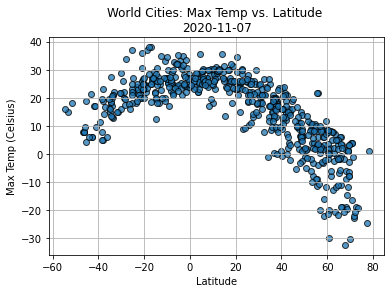

In [177]:
plt.scatter(city_weather_df.lat, city_weather_df.max_temp, alpha=0.75, edgecolors = 'black')
plt.grid(True)
plt.title(f"World Cities: Max Temp vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")
plt.savefig('figures/lat_vs_temp.png')
plt.show()

## Latitude vs. Humidity Plot

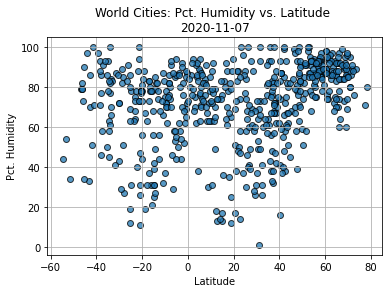

In [178]:
plt.scatter(city_weather_df.lat, city_weather_df.humidity, alpha=0.75, edgecolors = 'black')
plt.grid(True)
plt.title(f"World Cities: Pct. Humidity vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Humidity")
plt.savefig('figures/lat_vs_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

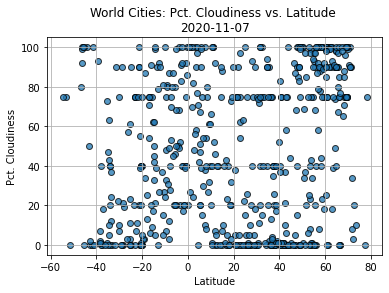

In [179]:
plt.scatter(city_weather_df.lat, city_weather_df.cloudiness, alpha=0.75, edgecolors = 'black')
plt.grid(True)
plt.title(f"World Cities: Pct. Cloudiness vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Cloudiness")
plt.savefig('figures/lat_vs_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

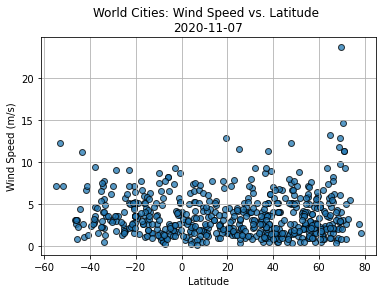

In [181]:
plt.scatter(city_weather_df.lat, city_weather_df.wind_speed, alpha=0.75, edgecolors = 'black')
plt.grid(True)
plt.title(f"World Cities: Wind Speed vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig('figures/lat_vs_ws.png')
plt.show()

## Linear Regression

In [ ]:
## Create DataFrames for hemisphere regressions
# Northern Hemisphere DF
northern_weather_df = city_weather_df.loc[city_weather_df.lat >= 0, :]

# Southern Hemisphere DF
southern_weather_df = city_weather_df.loc[city_weather_df.lat <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

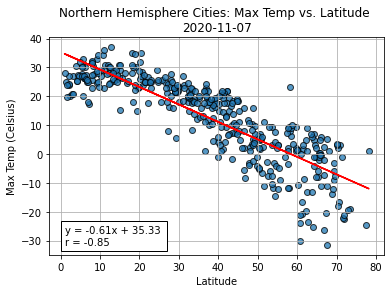

In [182]:
# Set Axes
x = northern_weather_df.lat
y = northern_weather_df.max_temp

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Northern Hemisphere Cities: Max Temp vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")
plt.savefig('figures/n_lat_vs_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

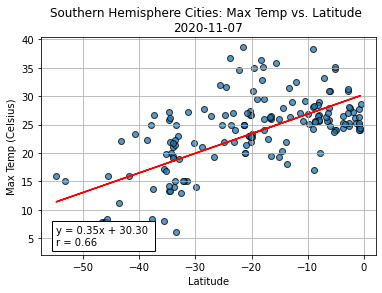

In [183]:
# Set Axes
x = southern_weather_df.lat
y = southern_weather_df.max_temp

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Southern Hemisphere Cities: Max Temp vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")
plt.savefig('figures/s_lat_vs_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

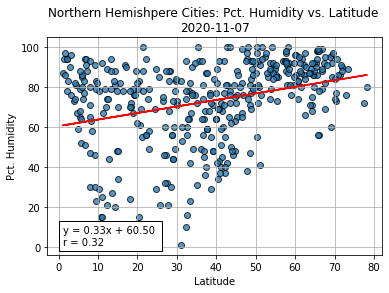

In [185]:
# Set Axes
x = northern_weather_df.lat
y = northern_weather_df.humidity

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Northern Hemishpere Cities: Pct. Humidity vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Humidity")
plt.savefig('figures/n_lat_vs_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

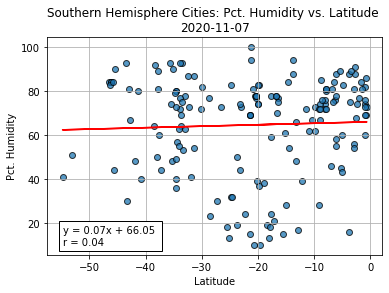

In [213]:
# Set Axes
x = southern_weather_df.lat
y = southern_weather_df.humidity

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Southern Hemisphere Cities: Pct. Humidity vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Humidity")
plt.savefig('figures/s_lat_vs_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

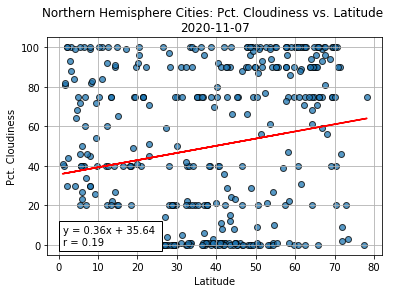

In [212]:
# Set Axes
x = northern_weather_df.lat
y = northern_weather_df.cloudiness

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Northern Hemisphere Cities: Pct. Cloudiness vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Cloudiness")
plt.savefig('figures/n_lat_vs_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

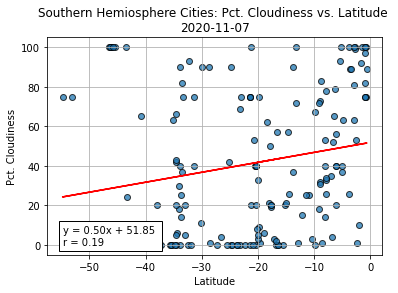

In [211]:
# Set Axes
x = southern_weather_df.lat
y = southern_weather_df.cloudiness

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), min(y), f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Southern Hemiosphere Cities: Pct. Cloudiness vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Pct. Cloudiness")
plt.savefig('figures/s_lat_vs_cloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

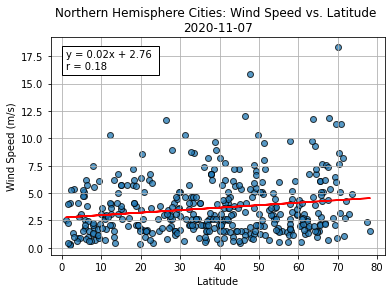

In [209]:
# Set Axes
x = northern_weather_df.lat
y = northern_weather_df.wind_speed

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), max(y) - 2, f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Northern Hemisphere Cities: Wind Speed vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig('figures/n_lat_vs_ws.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

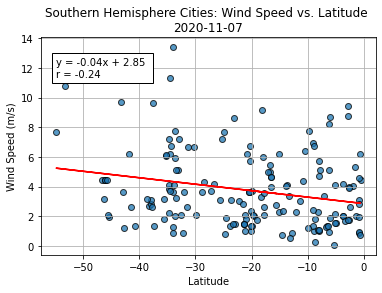

In [210]:
# Set Axes
x = southern_weather_df.lat
y = southern_weather_df.wind_speed

# Solve for regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot relationship
plt.scatter(x, y, alpha=0.75, edgecolors = 'black')
plt.plot(x, slope * x + intercept, color = 'r')
plt.text(min(x), max(y) - 2, f'y = {slope:.2f}x + {intercept:.2f} \nr = {r_value:.2f}', bbox=dict(facecolor='white', alpha=1))
plt.grid(True)
plt.title(f"Southern Hemisphere Cities: Wind Speed vs. Latitude \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig('figures/s_lat_vs_ws.png')
plt.show()